In [1]:
from pymongo import MongoClient

In [2]:
client = MongoClient("localhost", 27017)

In [3]:
db = client.trades

In [4]:
results = db.trades.aggregate([
        #{"$match": {"team": "Dallas Mavericks"}},
        {"$group": 
            {"_id": {"season":"$season", "team": "$team"}, 
             "grade": {"$avg": "$grade"}}}])

In [5]:
data = [[row["_id"]["season"], row["_id"]["team"], row["grade"]] for row in list(results)]

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame(data, columns=["season", "team", "grade"])

In [8]:
df = pd.pivot_table(df, index=["team", "season"])

In [9]:
df

grade
team                   season           
Atlanta Hawks          2014     6.500000
                       2015     5.000000
                       2016     8.500000
                       2017     7.000000
Boston Celtics         2014     7.333333
                       2015     9.000000
                       2016     8.500000
Brooklyn Nets          2014     7.000000
                       2015     8.600000
                       2016     5.000000
                       2017     8.333333
Charlotte Bobcats      2014     6.666667
Charlotte Hornets      2015     6.800000
                       2016     8.000000
                       2017     4.500000
Chicago Bulls          2014     6.000000
                       2016     8.000000
                       2017     6.500000
Cleveland Cavaliers    2014     6.000000
                       2015     9.000000
                       2016    11.000000
                       2017    10.250000
Dallas Mavericks       2014     6.000000
                       2015     7.000000
                       2016    11.000000
                       2017     7.333333
Denver Nuggets         2014     7.400000
                       2015     6.000000
                       2016     9.500000
                       2017     8.333333
...                                  ...
Philadelphia 76ers     2014     9.500000
                       2015     7.666667
                       2016     6.000000
                       2017     8.750000
Phoenix Suns           2014     9.500000
                       2015     8.285714
                       2016     7.666667
                       2017     6.500000
Portland Trail Blazers 2014     6.500000
                       2015     9.333333
                       2016     8.666667
                       2017     8.500000
Sacramento Kings       2014     6.166667
                       2015     8.250000
                       2016     4.666667
                       2017     6.500000
San Antonio Spurs      2014     8.000000
                       2016     8.500000
                       2017     7.000000
Toronto Raptors        2014     9.500000
                       2015     9.000000
                       2017    11.000000
Utah Jazz              2014     7.000000
                       2015     7.666667
                       2016     7.000000
                       2017     7.750000
Washington Wizards     2014     9.000000
                       2015     6.333333
                       2016     5.500000
                       2017     6.500000

[110 rows x 1 columns]

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

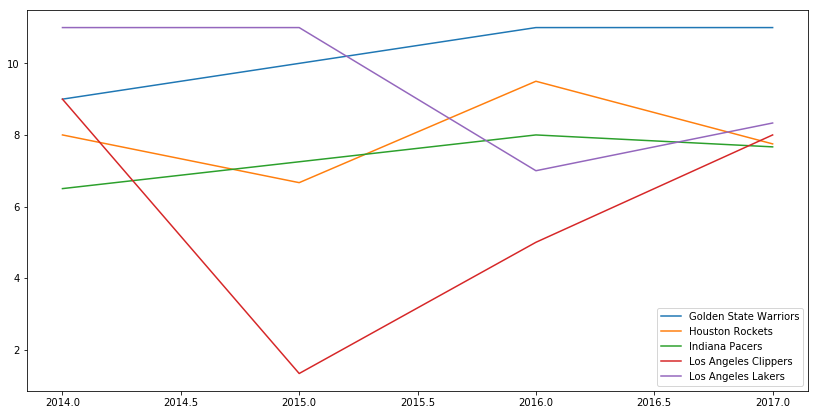

In [12]:
fig, ax = plt.subplots(figsize=(14,7))
for team in df.index.levels[0][10:15]:
    ax.plot(df.loc[team], label=team)
    
ax.legend(loc="lower right")